In [ ]:
import pandas as pd
#загружаем данные
data = pd.read_csv("https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv")
data.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
# переводим в см и кг
data['Height']*=2.54
data['Weight']*=0.4536
data.head()

,Gender,Height,Weight
0,Male,187.571423,109.722920
1,Male,174.706036,73.624030
2,Male,188.239668,96.499252
3,Male,182.196685,99.811265
4,Male,177.499761,93.600270


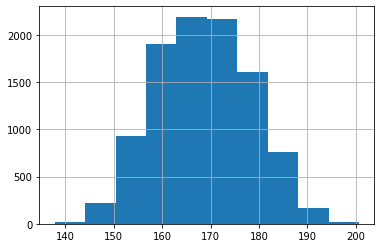

In [ ]:
# посмотрим на распределение данных
data['Height'].hist()

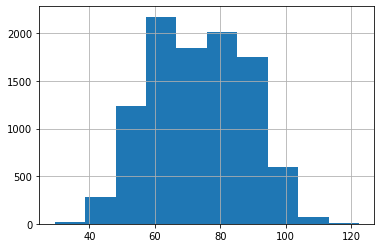

In [ ]:
data['Weight'].hist()

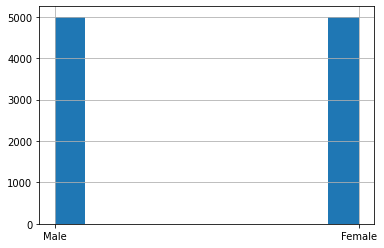

In [ ]:
data['Gender'].hist()

In [ ]:
#сокращаем выборку для наглядности
df=data[::50]

In [ ]:
#посмотрим на структуру данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 9950
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  200 non-null    object 
 1   Height  200 non-null    float64
 2   Weight  200 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [ ]:
#зададим вход и выход модели
X = df[['Height']]
y = df['Weight']

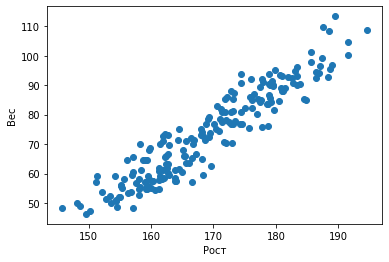

In [ ]:
#нарисуем точечный график
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel("Рост")
plt.ylabel("Вес")
plt.show()


In [ ]:
# построим модель парной линейной регрессии вида y=w*x+b
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y) # обучение модели
w=model.coef_
b=model.intercept_
w,b

(array([1.35909164]), -156.29141479529062)

y=1.36*x-156.3, где х-рост  в см, y-вес в кг

In [ ]:
#найдем предсказания модели
y_pred=model.predict(X)

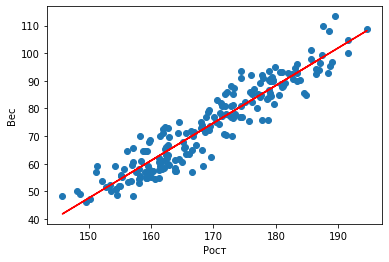

In [ ]:
#нарисуем  график исходных данных и построенной модели
X = df[['Height']]
y = df['Weight']
plt.scatter(X, y)
plt.plot(X, y_pred,'red')
plt.xlabel("Рост")
plt.ylabel("Вес")
plt.show()

In [ ]:
# вычислим точность построенной модели
model.score(X,y)

0.8847842952811868

In [ ]:
data1=data[:5000]
data2=data[5000:]

In [ ]:
data1.tail()

,Gender,Height,Weight
4996,Male,175.192494,72.251780
4997,Male,170.215039,90.355033
4998,Male,181.756605,84.326921
4999,Male,178.693775,90.222406
5000,Female,149.633259,46.307265


In [ ]:
#закодируем переменную Gender как 0 и 1
X1=df.drop(['Weight'], axis=1)
X1['Gender'] = pd.factorize(X1['Gender'])[0]

In [ ]:
#построим множественную регрессию вида y=w1*x1+w2*x2+b
model1 = LinearRegression()
model1.fit(X1, y) # обучение модели
w=model1.coef_
b=model1.intercept_
w,b

(array([-6.25690744,  3.0103385 ]), -124.03451070427748)

y=-6.3 *x1+3 *x2 - 124, где x1-пол,  х2-рост в см, y-вес в кг

In [ ]:
# вычислим точность построенной модели
model1.score(X1,y)

0.9294561135335533

In [ ]:
#найдем предсказания модели
y_pred1=model1.predict(X1)

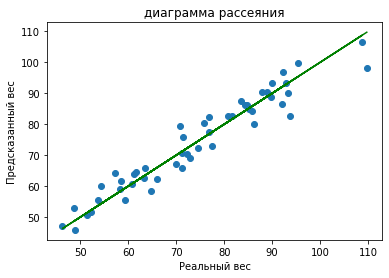

In [ ]:
#нарисуем  диаграмму рассеяния исходных  и предсказанных значений веса
plt.scatter(y, y_pred1)
plt.xlabel("Реальный вес")
plt.ylabel("Предсказанный вес")
plt.plot(y, y,'green')
plt.title('диаграмма рассеяния')
plt.show()